In [3]:
import numpy as np
import webbrowser
from aocd.models import Puzzle
import re
import itertools
from scipy.ndimage.filters import minimum_filter
from scipy.ndimage import label
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
puzzle = Puzzle(year=2021, day=13)

In [4]:
webbrowser.open(puzzle.url);

## Part 1

In [78]:
input_data = """
6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5
""".strip()

In [96]:
input_data = puzzle.input_data

In [113]:
points, folds = input_data.split("\n\n")
points = np.asarray(list(map(int, re.findall("\d+", points)))).reshape(-1, 2)
folds = folds.split("\n")
folds = [re.match("fold along (x|y)=(\d+)", f).groups() for f in folds]
folds = [(ax, int(p)) for ax, p in folds]

In [114]:
def fold(points, axis, fold_point):
    points = points.copy()
    axis = 1 if axis == "y" else 0
    selected = points[:, axis] > fold_point
    points[selected, axis] = fold_point - (points[selected, axis] - fold_point)
    return points

In [115]:
points = fold(points, *folds[0])

In [118]:
result = len(np.unique(points, axis=0))
result

592

In [101]:
puzzle.answer_a = result

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]


## Part 2

In [102]:
for f in folds[1:]:  # first fold already done in Part 1
    points = fold(points, *f)

In [103]:
def rasterize(points):
    max_x, max_y = points.max(0)
    grid = np.zeros((max_y + 1, max_x + 1), int)
    for x, y in points:
        grid[y, x] = 1
    return grid

In [105]:
grid = rasterize(points)

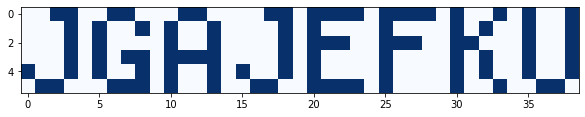

In [112]:
plt.imshow(grid, interpolation="none", cmap="Blues");
plt.gcf().set_size_inches(10, 6)

In [119]:
# fancy ocr for automatic code detection
from advent_of_code_ocr import convert_6

In [141]:
ascii = "\n".join(["".join(line) for line in np.where(grid, "#", ".")])

In [143]:
result = convert_6(ascii)
result

'JGAJEFKU'

In [107]:
puzzle.answer_b = result

That's the right answer!  You are one gold star closer to finding the sleigh keys.You have completed Day 13! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
